<a href="https://colab.research.google.com/github/easobral/dio_yolo_database/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Face recognition project

This project aims to train a ML model to recognize the caracters from Modern Times movie. A few frames were taken from the movie and we attempted to classify the folowing categories: Boss (the factory boss), chaplin (charles chapling), worker(one of the factory workers), and face (a generic face, not belonging to anyone in particular).

We download the dataset and install the required libraries

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

! wget -nv "https://drive.google.com/uc?export=download&id=1mBjNu1Is5sxNdk55k-2o-xRZN2AeSp2v" -O dataset.tar.gz
! tar -xf dataset.tar.gz && rm dataset.tar.gz

2025-02-10 20:41:52 URL:https://drive.usercontent.google.com/download?id=1mBjNu1Is5sxNdk55k-2o-xRZN2AeSp2v&export=download [10296228/10296228] -> "dataset.tar.gz" [1]
tar: labels/train/000.txt: time stamp 2025-02-10 22:21:10 is 5956.098205878 s in the future
tar: labels/train/001.txt: time stamp 2025-02-10 22:21:10 is 5956.098054185 s in the future
tar: labels/train/003.txt: time stamp 2025-02-10 22:21:10 is 5956.097981706 s in the future
tar: labels/train/004.txt: time stamp 2025-02-10 22:21:10 is 5956.097928493 s in the future
tar: labels/train/005.txt: time stamp 2025-02-10 22:21:10 is 5956.097857488 s in the future
tar: labels/train/006.txt: time stamp 2025-02-10 22:21:10 is 5956.097799235 s in the future
tar: labels/train/007.txt: time stamp 2025-02-10 22:21:10 is 5956.097744347 s in the future
tar: labels/train/008.txt: time stamp 2025-02-10 22:21:10 is 5956.097693239 s in the future
tar: labels/train/009.txt: time stamp 2025-02-10 22:21:10 is 5956.09763947 s in the future
tar: l

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.7/914.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

We set our configuration

In [ ]:
!rm data.yaml
!echo "train: images/train" >> data.yaml
!echo "val: images/val" >> data.yaml
!echo "nc: 4  # Number of classes" >> data.yaml
!echo "names: [\"Boss\", \"Chaplin\", \"worker\", \"face\"]" >> data.yaml
!ls
!cat data.yaml

rm: cannot remove 'data.yaml': No such file or directory
data.yaml  example  images  labels  sample_data
train: images/train
val: images/val
nc: 4  # Number of classes
names: ["Boss", "Chaplin", "worker", "face"]


In [ ]:
!mkdir datasets
!mv images datasets
!mv labels datasets
!ls datasets

images	labels


In [ ]:
from ultralytics import YOLO

# Load a pre-trained model (YOLOv8s in this case)
model = YOLO("yolov8s.pt")  # You can use "yolov8m.pt", "yolov8l.pt" etc.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 97.9MB/s]


Load and train our model

In [ ]:
# Train on custom dataset
model.train(data="data.yaml", epochs=50, batch=16)

Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

100%|██████████| 755k/755k [00:00<00:00, 44.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 134MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/labels/train... 39 images, 0 backgrounds, 0 corrupt: 100%|██████████| 39/39 [00:00<00:00, 497.63it/s]

train: New cache created: /content/datasets/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/labels/val... 18 images, 0 backgrounds, 0 corrupt: 100%|██████████| 18/18 [00:00<00:00, 296.24it/s]

val: New cache created: /content/datasets/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         4G      2.862      6.881       2.17         30        640: 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

                   all         18         35   0.000732     0.0718   0.000478   0.000158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.93G      2.874      7.087      2.201         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]

                   all         18         35   0.000719     0.0718   0.000482   0.000159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.79G      2.995      7.619      2.286         27        640: 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.77it/s]


                   all         18         35    0.00343      0.166    0.00221   0.000782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.17G        2.6      4.919       2.06         17        640: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         18         35      0.846      0.159      0.155     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.02G      2.294       3.69      1.707         17        640: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         18         35      0.421      0.274      0.186      0.086



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.18G      1.819      2.872      1.479         32        640: 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         18         35      0.217        0.4      0.267      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.07G      1.921      2.756      1.563         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         18         35      0.319      0.379      0.372      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.18G      1.653      2.347      1.384         11        640: 100%|██████████| 3/3 [00:00<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all         18         35      0.555      0.401      0.395      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.06G      1.672      2.069       1.29         25        640: 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         18         35      0.446      0.454      0.448      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.02G      1.503      1.748      1.294         31        640: 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         18         35      0.597      0.457      0.601      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.07G      1.542      1.735      1.246         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all         18         35      0.538      0.509      0.533      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.16G      1.506      1.606       1.26         20        640: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         18         35      0.492        0.6      0.532      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.09G      1.436       1.48      1.195         31        640: 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         18         35      0.803      0.443      0.636      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.18G      1.377      1.503      1.211         22        640: 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         18         35      0.593      0.593      0.639      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.07G      1.197      1.363      1.123         16        640: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all         18         35      0.708       0.57      0.669      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.13G      1.325      1.252       1.13         32        640: 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all         18         35      0.487      0.581      0.645      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.05G      1.157      1.218      1.074         26        640: 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         18         35      0.605      0.599      0.618      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.04G      1.255      1.206      1.097         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         18         35      0.563      0.575      0.538       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.17G      1.188      1.102      1.086         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         18         35      0.491      0.399      0.459      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.17G      1.133      1.046      1.097         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         18         35      0.533      0.265      0.346      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.03G      1.096      1.067      1.142         29        640: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         18         35      0.646      0.354      0.418      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.03G      1.152     0.9849      1.099         23        640: 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.27it/s]


                   all         18         35       0.65      0.466      0.644      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.03G      1.159     0.9883      1.096         22        640: 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         18         35      0.554       0.56       0.69      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.03G      1.065       0.85      1.066         31        640: 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all         18         35      0.522      0.611      0.711      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.14G      1.116     0.9535      1.071         38        640: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         18         35      0.513      0.594      0.714      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.19G      1.171      1.067       1.11         15        640: 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         18         35      0.519      0.589      0.692      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.03G      1.072     0.8962       1.05         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         18         35      0.589      0.554      0.679      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.03G      1.035     0.7799      1.017         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all         18         35      0.592      0.507      0.663      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.03G      1.045     0.8534      1.036         29        640: 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all         18         35      0.592      0.507      0.663      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.05G      1.091     0.7579      1.055         29        640: 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.02it/s]

                   all         18         35      0.577      0.547      0.667      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.06G      1.028      0.791     0.9843         32        640: 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         18         35      0.587      0.546       0.67      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.06G     0.9887     0.7747      1.035         29        640: 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         18         35      0.701      0.491      0.684      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.19G      1.029     0.7374      1.027         25        640: 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         18         35      0.701      0.491      0.684      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.05G     0.9978     0.6975       1.02         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

                   all         18         35      0.716      0.556        0.7      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.04G     0.9164     0.7137     0.9867         23        640: 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         18         35      0.721      0.655       0.72      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.07G      0.976     0.7501      1.019         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         18         35      0.714      0.642      0.734      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.19G     0.9064     0.7246     0.9317         28        640: 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


                   all         18         35      0.714      0.642      0.734      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.89G     0.8946     0.6535     0.9556         25        640: 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         18         35      0.614      0.673      0.739      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.05G     0.8566     0.6606     0.9448         16        640: 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]

                   all         18         35      0.592      0.699      0.755      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.07G     0.8655     0.6545     0.9823         19        640: 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         18         35      0.702      0.596      0.768      0.493


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.01G     0.9703     0.6782     0.9776         17        640: 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         18         35      0.702      0.596      0.768      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.88G     0.7724     0.6066     0.9694         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         18         35      0.707      0.599      0.786      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.04G     0.8219     0.6178     0.9326         15        640: 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         18         35      0.709      0.621      0.788      0.482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.05G     0.8012     0.5829     0.9808         12        640: 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]

                   all         18         35      0.707      0.635      0.792       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.01G     0.7615      0.571     0.9522         13        640: 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         18         35      0.707      0.635      0.792       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.88G     0.8033     0.6056     0.9501         21        640: 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         18         35      0.695      0.636      0.787      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.86G     0.7873     0.5854     0.9317         14        640: 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         18         35      0.693      0.627      0.779      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.07G     0.7727      0.593     0.9795         11        640: 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         18         35      0.669       0.62      0.774      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.17G     0.7147     0.5414      0.907         14        640: 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.42it/s]

                   all         18         35      0.669       0.62      0.774      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.03G     0.6775     0.5393     0.9501         13        640: 100%|██████████| 3/3 [00:00<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         18         35      0.662      0.615      0.773      0.484



50 epochs completed in 0.038 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.74 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all         18         35      0.707        0.6      0.785      0.508
                  Boss          2          2      0.163        0.5      0.537      0.429
               Chaplin         11         11      0.835      0.636      0.829       0.47
                worker          8          8          1      0.561      0.907      0.593
                  face          8         14       0.83      0.701      0.867      0.538
Speed: 0.1ms preprocess, 2.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78691bfc7750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

It looks like our model has good results. We need to be careful though. Since we did not use a validation dataset, it might mean just that the model overfitted, meaning we should improve our dataset.


image 1/1 /content/example/ex_001.png: 448x640 1 Boss, 13.6ms
Speed: 3.2ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


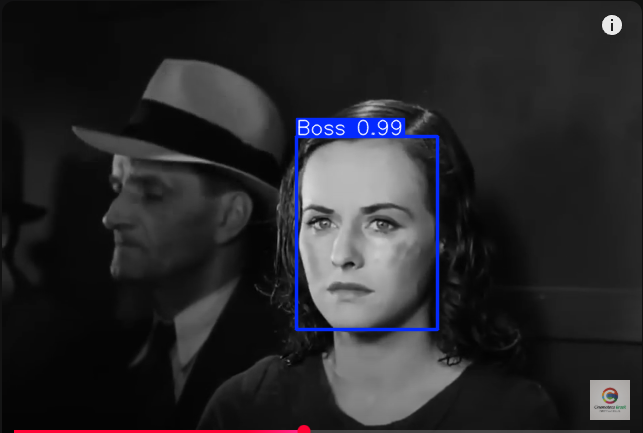


image 1/1 /content/example/ex_002.png: 448x640 1 Boss, 13.1ms
Speed: 3.5ms preprocess, 13.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


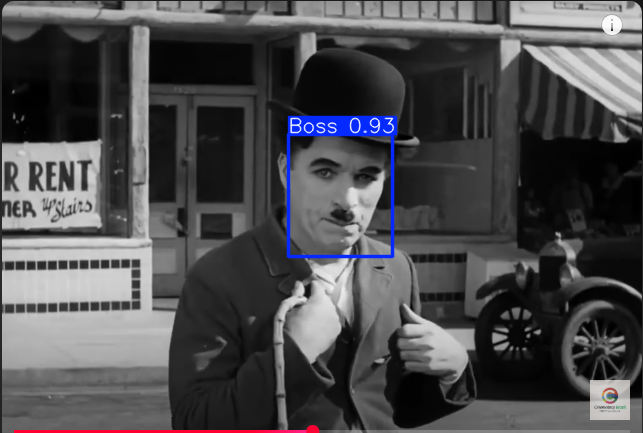


image 1/1 /content/example/ex_003.png: 448x640 2 faces, 13.1ms
Speed: 3.5ms preprocess, 13.1ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


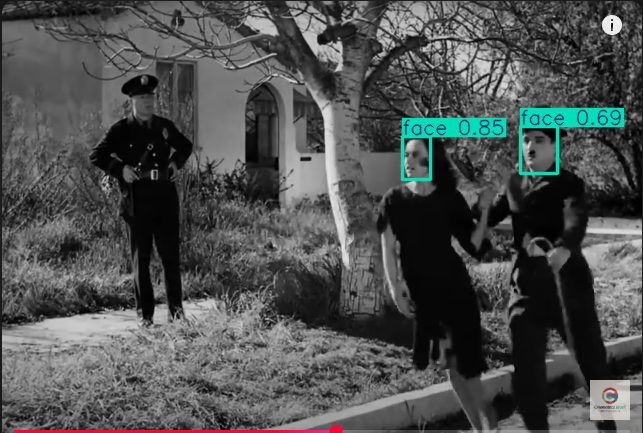


image 1/1 /content/example/ex_005.png: 448x640 1 face, 13.1ms
Speed: 3.6ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


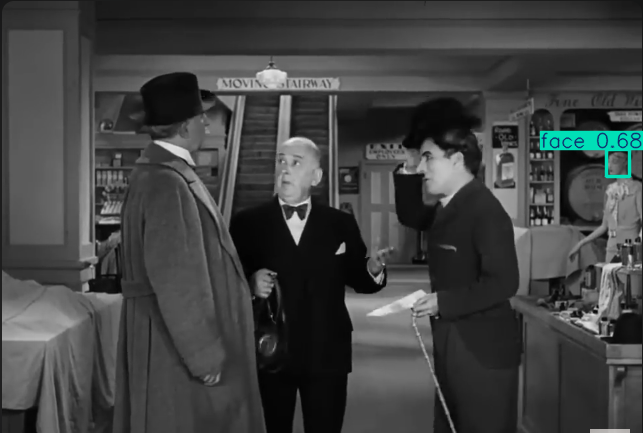


image 1/1 /content/example/ex_006.png: 448x640 2 Bosss, 1 face, 13.1ms
Speed: 6.8ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


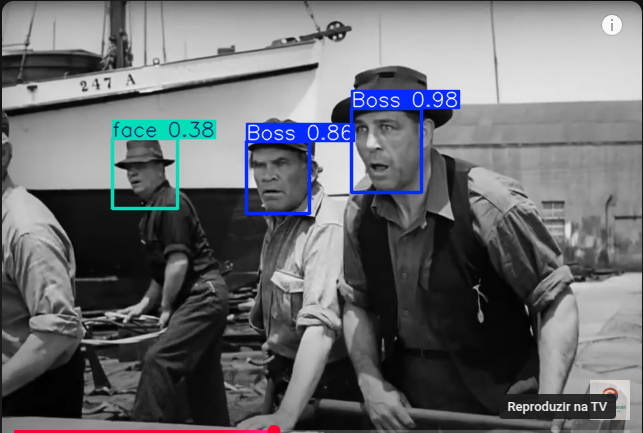


image 1/1 /content/example/ex_007.png: 448x640 2 Bosss, 1 Chaplin, 13.1ms
Speed: 3.3ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


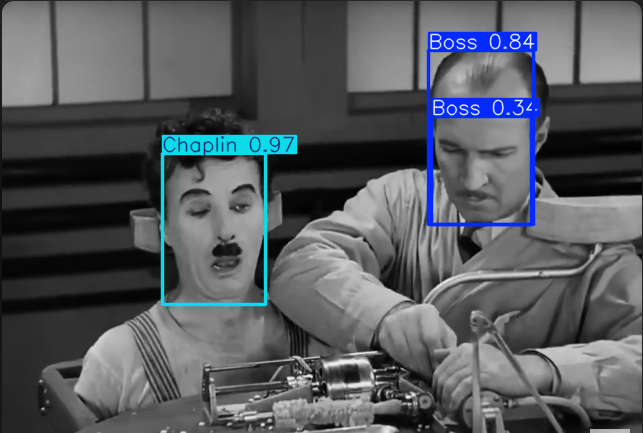

In [ ]:
result = model("example/ex_001.png")
result[0].show()
result = model("example/ex_002.png")
result[0].show()
result = model("example/ex_003.png")
result[0].show()
result = model("example/ex_005.png")
result[0].show()
result = model("example/ex_006.png")
result[0].show()
result = model("example/ex_007.png")
result[0].show()

It looks like the model isn't good yet. The accuracy results we got before were probably related to overfitting. Our model probably needs much more images and examples to generalize well enough.
We should also prepare a test set to better evaluate this issue.